In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv('placement.csv')

In [5]:
df.sample(5)

,cgpa,placement_exam_marks,placed
791,7.65,12.0,1
137,5.69,53.0,0
592,7.09,27.0,1
778,6.98,34.0,0
847,7.20,54.0,1


In [7]:
df.shape

(1000, 3)

# Note => We cannot (or should not) use sns.distplot() anymore because it has been deprecated (officially marked for removal) in the newer versions of the Seaborn library (specifically since version 0.11.0 and completely removed in v0.14.0).

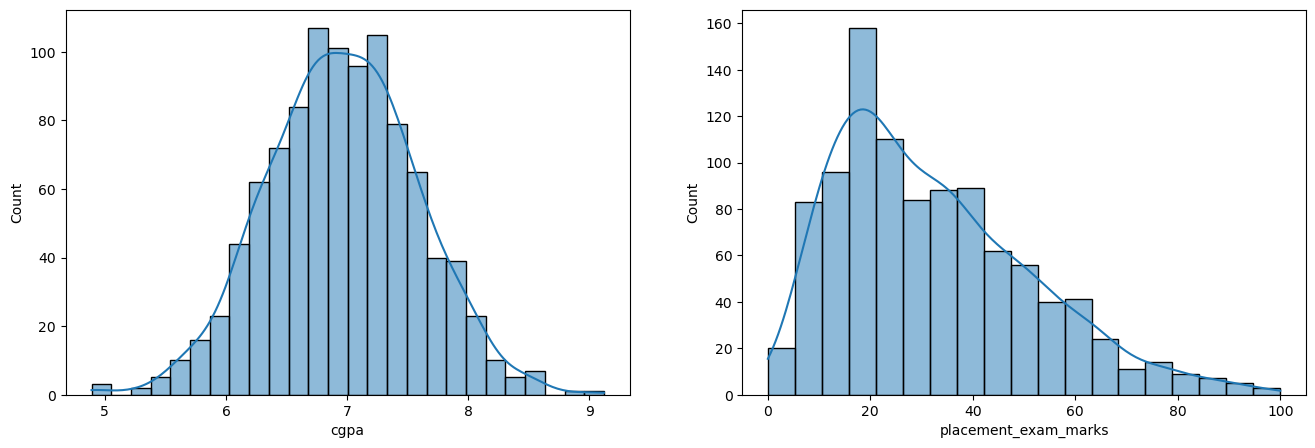

In [17]:
plt.figure(figsize =(16,5))
plt.subplot(1,2,1)


# sns.distplot(df['cgpa'])
sns.histplot(df['cgpa'],kde = True)

plt.subplot(1,2,2)
sns.histplot(df['placement_exam_marks'],kde = True)

plt.show()

In [20]:
# It is Right skewed---------------------------->

df['placement_exam_marks'].skew()

0.8356419499466834

In [22]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<Axes: xlabel='placement_exam_marks'>

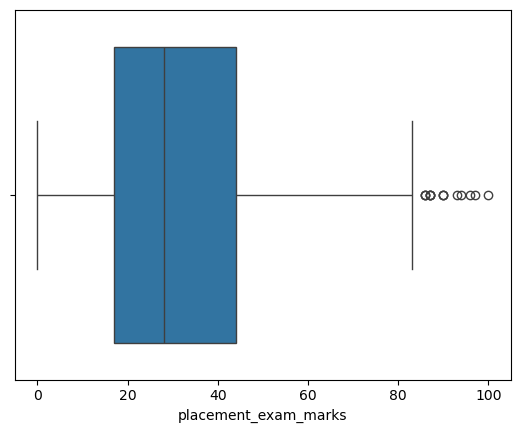

In [26]:
sns.boxplot(x = df['placement_exam_marks'])

In [28]:
# Finding the IQR ---------------------------->

# Q1--->
percentile25 = df['placement_exam_marks'].quantile(0.25)

# Q3--->
percentile75 = df['placement_exam_marks'].quantile(0.75)

In [30]:
percentile25

17.0

In [32]:
percentile75

44.0

In [38]:
# iqr = Q3 - Q1
iqr = percentile75 - percentile25

In [40]:
iqr

27.0

In [42]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [44]:
print('Upper Limit: ',upper_limit)
print('Lower Limit: ',lower_limit)

Upper Limit:  84.5
Lower Limit:  -23.5


# Finding Outliers

In [59]:
df[df['placement_exam_marks'] > upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [55]:
df[df['placement_exam_marks'] < lower_limit]

,cgpa,placement_exam_marks,placed


In [51]:
df[(df['placement_exam_marks'] > upper_limit) | (df['placement_exam_marks'] < lower_limit)]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


# Trimming ----------------------------------------------->

In [62]:
new_df = df[(df['placement_exam_marks'] < upper_limit) & (df['placement_exam_marks'] > lower_limit)]

In [64]:
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


In [66]:
new_df.shape

(985, 3)

<Axes: xlabel='placement_exam_marks'>

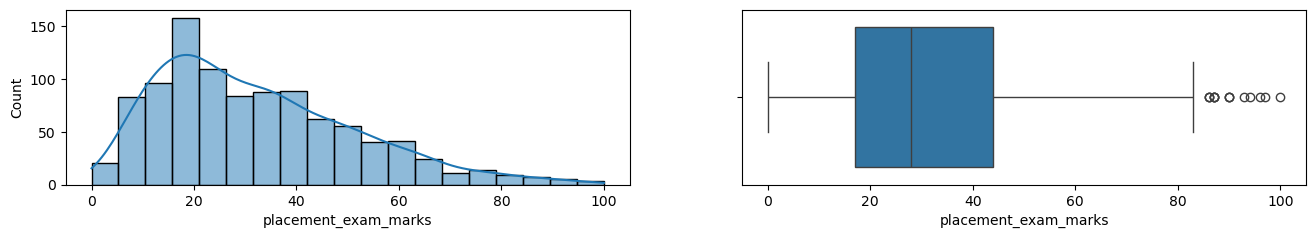

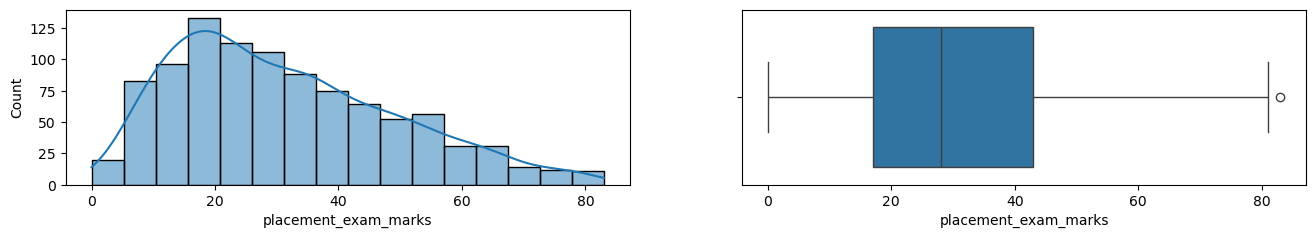

In [76]:
# Comparing ---------------------------------------------> 

# Before ----------------->
plt.figure(figsize = (16,5))
plt.subplot(2,2,1)
sns.histplot(df['placement_exam_marks'],kde = True)
plt.subplot(2,2,2)
sns.boxplot(x = df['placement_exam_marks'])


# After ----------------->
plt.figure(figsize = (16,5))
plt.subplot(2,2,3)
sns.histplot(new_df['placement_exam_marks'],kde = True)
plt.subplot(2,2,4)
sns.boxplot(x = new_df['placement_exam_marks'])

# Note -> We have removed the Outliers by Trimming using IQR method

# Capping ------------------->

In [79]:
new_df_cap = df.copy()

In [83]:
new_df_cap['placement_exam_marks'] = np.where(
    new_df_cap['placement_exam_marks'] > upper_limit , upper_limit,
    np.where(
        new_df_cap['placement_exam_marks'] < lower_limit , lower_limit,
        new_df_cap['placement_exam_marks']
    )
)

In [85]:
new_df_cap

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


In [87]:
new_df_cap.shape

(1000, 3)

<Axes: xlabel='placement_exam_marks'>

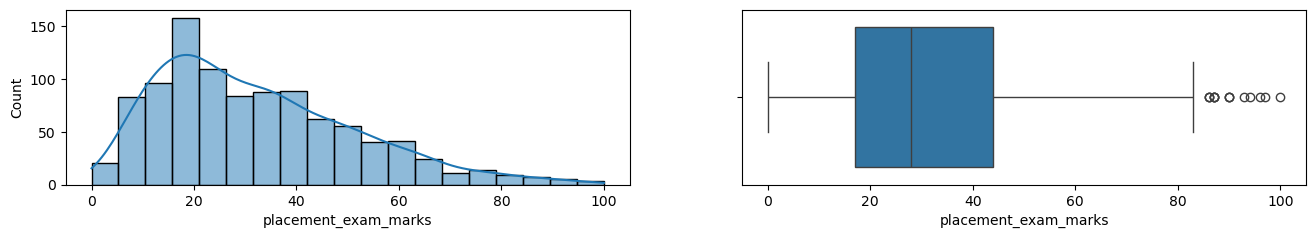

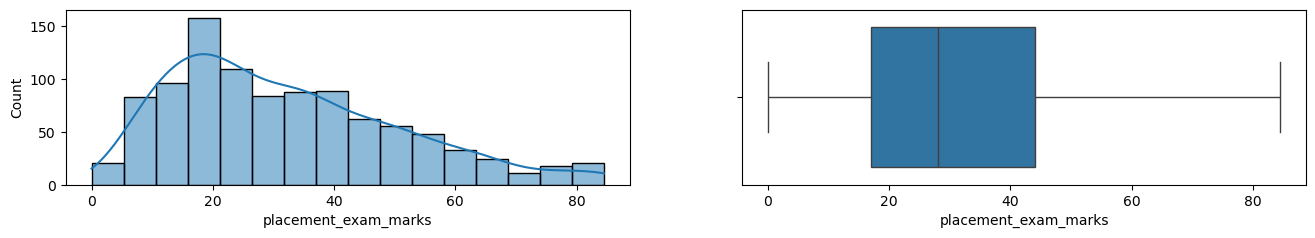

In [89]:
# Comparing ---------------------------------------------> 

# Before ----------------->
plt.figure(figsize = (16,5))
plt.subplot(2,2,1)
sns.histplot(df['placement_exam_marks'],kde = True)
plt.subplot(2,2,2)
sns.boxplot(x = df['placement_exam_marks'])


# After ----------------->
plt.figure(figsize = (16,5))
plt.subplot(2,2,3)
sns.histplot(new_df_cap['placement_exam_marks'],kde = True)
plt.subplot(2,2,4)
sns.boxplot(x = new_df_cap['placement_exam_marks'])

# Note -> We have removed the Outliers by Trimming using IQR method